# Influence of the Expansion of Space on the Gravitation Fields Surrounding Individual Stars by Einstein and Strauss
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

Will go back and get right linear combination of Ricci to get field equations listed as 2.1 - 2.4

https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.17.120

https://d1wqtxts1xzle7.cloudfront.net/40294189/Einstein-Strauss_original-with-cover-page-v2.pdf?Expires=1640961758&Signature=ZOwtzzcUv7BYI9ANkmF-D2upwT3qEd2Nx-qpgni9bOGKD4UWaLqS8qBc~uhAqSaJxBVwT8rFqyTTietQv5lSEPd56LpGIxouXmkvceTrurSoUJVoV6w0F1kUbKeqFJmCsNNEqIEPMOo7MhxDHpE4rNzOKLVFufRmrYqcJD28iDP~ti1nTV4dwXNewVXY7yN~kiiOOajLIOV9RBJ7ijKWM9-U~Pv6~8fK2vkTcmQbSiqIz1ZrMRx0YVqEmxetrWyJdwk9qn2K~RANkFr63djF2xeHrzUSJLL7rBtxMiC55AGS6NE2XjOuamLu~B7RtovAeT0rSZ8IiExNE~gTKhmguA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
t,r,y,z,dt,dr,dy,dz = symbols( 't r y z dt dr dy dz' ) 

In [5]:
mu = Function('mu')(r,t)
mu

In [6]:
nu = Function('nu')(r,t)
nu

In [7]:
variables = Matrix( [t,r,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix( [dt,dr,dy,dz] ) 
differentials

⎡dt⎤
⎢  ⎥
⎢dr⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [9]:
lineElement = expand( -exp(mu) * (dr**2 + dy**2 + dz**2 ) + exp(nu)*dt**2 ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ ν(r, t)                                 ⎤
⎢ℯ             0          0          0    ⎥
⎢                                         ⎥
⎢            μ(r, t)                      ⎥
⎢   0      -ℯ             0          0    ⎥
⎢                                         ⎥
⎢                       μ(r, t)           ⎥
⎢   0          0      -ℯ             0    ⎥
⎢                                         ⎥
⎢                                  μ(r, t)⎥
⎣   0          0          0      -ℯ       ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡ ν(r, t)                                 ⎤
⎢ℯ             0          0          0    ⎥
⎢                                         ⎥
⎢            μ(r, t)                      ⎥
⎢   0      -ℯ             0          0    ⎥
⎢                                         ⎥
⎢                       μ(r, t)           ⎥
⎢   0          0      -ℯ             0    ⎥
⎢                                         ⎥
⎢                                  μ(r, t)⎥
⎣   0          0          0      -ℯ       ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r y z")
t,r,y,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡⎡∂                     ∂                                                                                    ⎤  ⎡ -μ(r, t)  ν(r, t) ∂    
⎢⎢──(ν(r, t))           ──(ν(r, t))                                                                          ⎥  ⎢ℯ        ⋅ℯ       ⋅──(ν(
⎢⎢∂t                    ∂r                                                                                   ⎥  ⎢                   ∂r   
⎢⎢───────────           ───────────                          0                               0               ⎥  ⎢────────────────────────
⎢⎢     2                     2                                                                               ⎥  ⎢              2         
⎢⎢                                                                                                           ⎥  ⎢                        
⎢⎢∂             μ(r, t)  -ν(r, t) ∂                                                                          ⎥  ⎢         ∂              
⎢⎢──(ν(r, t))  ℯ       ⋅ℯ        ⋅

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡⎛                          2                                                     2                                                      
⎢⎜     μ(r, t) ⎛∂          ⎞       μ(r, t) ∂           ∂                μ(r, t)  ∂              ν(r, t) ∂           ∂              ν(r, t
⎢⎜- 3⋅ℯ       ⋅⎜──(μ(r, t))⎟  + 3⋅ℯ       ⋅──(μ(r, t))⋅──(ν(r, t)) - 6⋅ℯ       ⋅───(μ(r, t)) + ℯ       ⋅──(μ(r, t))⋅──(ν(r, t)) + ℯ      
⎢⎜             ⎝∂t         ⎠               ∂t          ∂t                         2                     ∂r          ∂r                   
⎢⎝                                                                              ∂t                                                       
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                              4                                         
⎢                                 

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡⎛                          2                                                     2                                                      
⎢⎜     μ(r, t) ⎛∂          ⎞       μ(r, t) ∂           ∂                μ(r, t)  ∂              ν(r, t) ∂           ∂              ν(r, t
⎢⎜- 3⋅ℯ       ⋅⎜──(μ(r, t))⎟  + 3⋅ℯ       ⋅──(μ(r, t))⋅──(ν(r, t)) - 6⋅ℯ       ⋅───(μ(r, t)) + ℯ       ⋅──(μ(r, t))⋅──(ν(r, t)) + ℯ      
⎢⎜             ⎝∂t         ⎠               ∂t          ∂t                         2                     ∂r          ∂r                   
⎢⎝                                                                              ∂t                                                       
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                              4                                         
⎢                                 

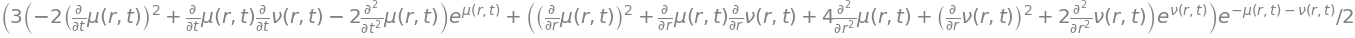

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                        ⎡0  0  0  0⎤                    
⎢                                 

In [22]:
simplifiedEinstein = simplify(einst.tensor())
simplifiedEinstein

⎡                                                                                                                                        
⎢     ⎛                          2                         2                  2         ⎞                                                
⎢     ⎜     μ(r, t) ⎛∂          ⎞     ν(r, t) ⎛∂          ⎞         ν(r, t)  ∂          ⎟  -μ(r, t)                                      
⎢0.25⋅⎜3.0⋅ℯ       ⋅⎜──(μ(r, t))⎟  - ℯ       ⋅⎜──(μ(r, t))⎟  - 4.0⋅ℯ       ⋅───(μ(r, t))⎟⋅ℯ                                              
⎢     ⎜             ⎝∂t         ⎠             ⎝∂r         ⎠                   2         ⎟                                                
⎢     ⎝                                                                     ∂r          ⎠                                                
⎢                                                                                                                                        
⎢                                 

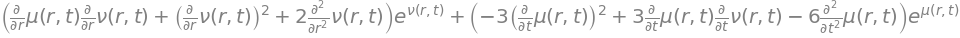

In [51]:
equation2pt4a = collect( collect( Ric.tensor()[0,0].args[1] , exp(mu) ), exp(nu) )
equation2pt4a

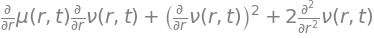

In [70]:
equation2pt4a.args[0].args[0]

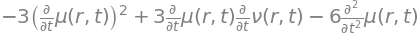

In [71]:
equation2pt4a.args[1].args[0]

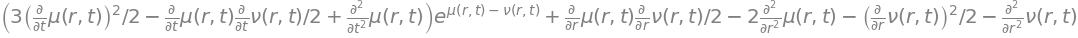

In [52]:
equation2pt2a = collect( 2*Ric.tensor()[1,1] , exp(mu-nu) ) 
equation2pt2a

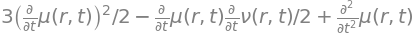

In [75]:
equation2pt2a.args[3].args[0]

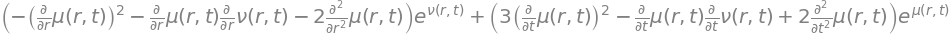

In [53]:
equation2pt4b =collect( collect( Ric.tensor()[2,2].args[1] , exp(mu) ) ,exp(nu) ) 
equation2pt4b

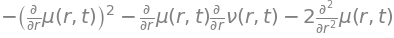

In [81]:
equation2pt4b.args[0].args[0]

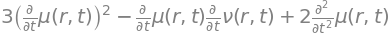

In [85]:
equation2pt4b.args[1].args[0]

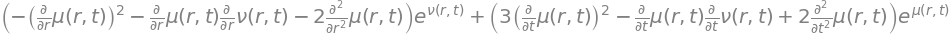

In [56]:
equation2pt4c = collect( collect( Ric.tensor()[3,3].args[1] , exp(mu) ) , exp(nu) ) 
equation2pt4c

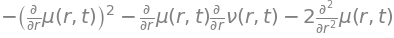

In [89]:
equation2pt4c.args[0].args[0]

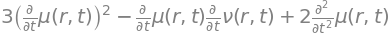

In [93]:
equation2pt4c.args[1].args[0]

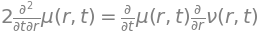

In [38]:
equation2pt3 = Eq(2*diff(mu,r,t) , 2*solve( Ric.tensor()[1,0] , diff(mu,r,t) )[0] ) 
equation2pt3

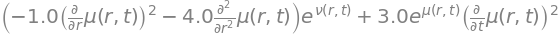

In [110]:
collect( simplifiedEinstein[0,0].args[1] , exp(nu))

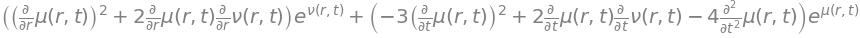

In [109]:
collect( collect( simplifiedEinstein[1,1].args[1] , exp(mu) ) , exp(nu))

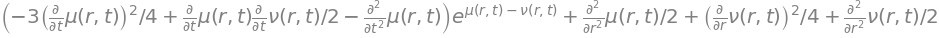

In [107]:
collect( simplifiedEinstein[2,2] , exp(mu-nu) ) 

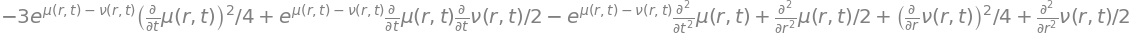

In [105]:
simplifiedEinstein[3,3]

In [106]:
simplifiedEinstein[2,2] == simplifiedEinstein[3,3]

True